# Support Vector Classifier Strategy Code

In this notebook, you will learn to create a support vector classifier (SVC) algorithm on S&P500. 

SVCs are supervised learning models. A set of training data is provided to the SVC algorithm, each belonging to one of the categories. For instance, the categories can be either to buy or to sell a stock. The algorithm builds a model during the training phase and assigns new data into one of the categories based on the model created during the training phase.


## Import the libraries

In [13]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Read S&P500 data

We will read the S&P500 data from CSV file.

In [3]:
# Fetch the data 
Df = pd.read_csv("data/SPY.csv")
Df= Df.dropna()
Df = Df.set_index(Df.Date)
Df = Df.drop(columns='Date')
Df.head()

,Open,High,Low,Close,Volume
Date,,,,,
03-01-2017,215.6950,216.4522,214.5867,215.8867,91366522
04-01-2017,216.2509,217.3340,216.2413,217.1710,78744433
05-01-2017,216.8739,217.1710,216.1167,216.9985,78379012
06-01-2017,217.1231,218.2924,216.5193,217.7749,71559922
09-01-2017,217.4873,217.6408,217.0141,217.0560,46939676


## Define the explanatory variables

Explanatory variables are used to predict the value of the S&P500 price for the next trading day. The X is a dataset that holds the variables which are used to predict the value of the S&P500, that is, whether the S&P500 index price will go up (1) or go down (-1) tomorrow. The X consists of variables such as 'Open - Close' and 'High - Low'. These can be understood as indicators based on which the algorithm will predict tomorrow's trend. Feel free to add more indicators and see the performance.



In [4]:
# Predictor variables
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
X= Df[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
03-01-2017,-0.1917,1.8655
04-01-2017,-0.9201,1.0927
05-01-2017,-0.1246,1.0543
06-01-2017,-0.6518,1.7731
09-01-2017,0.4313,0.6267


## Define the target variable

Target variable is the outcome which the machine learning model will predict based on the explanatory variables. y is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict. If tomorrow's price is greater than today's price then we will buy the S&P500 index, else we will sell the S&P500 index. We will store +1 for a buy signal and -1 for a sell signal in y.

In [5]:
# Target variables
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

## Split the data into train and test

Now, we will split data into training and test data set. 

1. First, 80% of data is used for training and remaining data for testing.
2. X_train and y_train are training dataset.
3. X_test and y_test are test dataset.

In [6]:
split_percentage = 0.8
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split] 

# Test data set
X_test = X[split:]
y_test = y[split:]

# Support Vector Classifier (SVC)

We will use SVC() function from sklearn.svm.SVC library to create our classifier model using fit() method on the training data set.

In [33]:
#our MLP object with some properties
mlp = MLPClassifier(verbose=True)
print(mlp)

#training our MLP
iterations = 100
loss = np.zeros([iterations,1])

for ix in range(iterations):
    mlp.fit(X_train, y_train)
    Y_hat = mlp.predict(X_train)
    y_tmp = np.argmax(Y_hat)




MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)
Iteration 1, loss = 0.68798425
Iteration 2, loss = 0.68630799
Iteration 3, loss = 0.68478124
Iteration 4, loss = 0.68339732
Iteration 5, loss = 0.68214362
Iteration 6, loss = 0.68101930
Iteration 7, loss = 0.68002197
Iteration 8, loss = 0.67914352
Iteration 9, loss = 0.67837750
Iteration 10, loss = 0.67771551
Iteration 11, loss = 0.67714179
Iteration 12, loss = 0.67664849
Iteration 13, loss = 0.67621319
Iteration 14, loss = 0.67582459
Iteration 15, loss = 0.67547540
Iteration 16, loss = 0.67514861
Iteration 17, loss = 0.67485166
Iteration 18, loss = 0.67457318


Iteration 13, loss = 0.67590928
Iteration 14, loss = 0.67556850
Iteration 15, loss = 0.67524953
Iteration 16, loss = 0.67494802
Iteration 17, loss = 0.67465761
Iteration 18, loss = 0.67437364
Iteration 19, loss = 0.67410202
Iteration 20, loss = 0.67384813
Iteration 21, loss = 0.67361063
Iteration 22, loss = 0.67339000
Iteration 23, loss = 0.67318721
Iteration 24, loss = 0.67300454
Iteration 25, loss = 0.67284793
Iteration 26, loss = 0.67271275
Iteration 27, loss = 0.67259482
Iteration 28, loss = 0.67249946
Iteration 29, loss = 0.67241900
Iteration 30, loss = 0.67235281
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67757687
Iteration 2, loss = 0.67696734
Iteration 3, loss = 0.67638873
Iteration 4, loss = 0.67585652
Iteration 5, loss = 0.67537113
Iteration 6, loss = 0.67492516
Iteration 7, loss = 0.67452315
Iteration 8, loss = 0.67417074
Iteration 9, loss = 0.67386760
Iteration 10, loss = 0.67359968
Iteration 11, loss = 0

Iteration 2, loss = 0.68624369
Iteration 3, loss = 0.68515667
Iteration 4, loss = 0.68414518
Iteration 5, loss = 0.68321027
Iteration 6, loss = 0.68235051
Iteration 7, loss = 0.68155939
Iteration 8, loss = 0.68084039
Iteration 9, loss = 0.68018293
Iteration 10, loss = 0.67957524
Iteration 11, loss = 0.67900540
Iteration 12, loss = 0.67847356
Iteration 13, loss = 0.67796962
Iteration 14, loss = 0.67749574
Iteration 15, loss = 0.67704837
Iteration 16, loss = 0.67661519
Iteration 17, loss = 0.67619946
Iteration 18, loss = 0.67580218
Iteration 19, loss = 0.67542425
Iteration 20, loss = 0.67506873
Iteration 21, loss = 0.67473235
Iteration 22, loss = 0.67441992
Iteration 23, loss = 0.67412919
Iteration 24, loss = 0.67386562
Iteration 25, loss = 0.67362899
Iteration 26, loss = 0.67341535
Iteration 27, loss = 0.67322415
Iteration 28, loss = 0.67305158
Iteration 29, loss = 0.67289122
Iteration 30, loss = 0.67274655
Iteration 31, loss = 0.67261123
Iteration 32, loss = 0.67248927
Iteration 33, lo

Iteration 2, loss = 0.68121049
Iteration 3, loss = 0.67988802
Iteration 4, loss = 0.67872872
Iteration 5, loss = 0.67772665
Iteration 6, loss = 0.67688467
Iteration 7, loss = 0.67619381
Iteration 8, loss = 0.67563823
Iteration 9, loss = 0.67520289
Iteration 10, loss = 0.67487211
Iteration 11, loss = 0.67463579
Iteration 12, loss = 0.67446680
Iteration 13, loss = 0.67435381
Iteration 14, loss = 0.67428282
Iteration 15, loss = 0.67422170
Iteration 16, loss = 0.67416210
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.69624620
Iteration 2, loss = 0.69411455
Iteration 3, loss = 0.69210191
Iteration 4, loss = 0.69022057
Iteration 5, loss = 0.68846594
Iteration 6, loss = 0.68683636
Iteration 7, loss = 0.68533102
Iteration 8, loss = 0.68395329
Iteration 9, loss = 0.68270746
Iteration 10, loss = 0.68158479
Iteration 11, loss = 0.68058280
Iteration 12, loss = 0.67969368
Iteration 13, loss = 0.67890811
Iteration 14, loss = 0.6782186

Iteration 1, loss = 0.72277562
Iteration 2, loss = 0.71918720
Iteration 3, loss = 0.71576070
Iteration 4, loss = 0.71249511
Iteration 5, loss = 0.70938647
Iteration 6, loss = 0.70644897
Iteration 7, loss = 0.70367228
Iteration 8, loss = 0.70106397
Iteration 9, loss = 0.69861796
Iteration 10, loss = 0.69633499
Iteration 11, loss = 0.69420679
Iteration 12, loss = 0.69222665
Iteration 13, loss = 0.69039416
Iteration 14, loss = 0.68870000
Iteration 15, loss = 0.68713659
Iteration 16, loss = 0.68570972
Iteration 17, loss = 0.68440966
Iteration 18, loss = 0.68323032
Iteration 19, loss = 0.68216340
Iteration 20, loss = 0.68120186
Iteration 21, loss = 0.68033673
Iteration 22, loss = 0.67955866
Iteration 23, loss = 0.67886064
Iteration 24, loss = 0.67823605
Iteration 25, loss = 0.67768616
Iteration 26, loss = 0.67719780
Iteration 27, loss = 0.67676897
Iteration 28, loss = 0.67639118
Iteration 29, loss = 0.67605965
Iteration 30, loss = 0.67577081
Iteration 31, loss = 0.67551720
Iteration 32, los

Iteration 37, loss = 0.67545801
Iteration 38, loss = 0.67521225
Iteration 39, loss = 0.67497842
Iteration 40, loss = 0.67476003
Iteration 41, loss = 0.67455217
Iteration 42, loss = 0.67435217
Iteration 43, loss = 0.67416205
Iteration 44, loss = 0.67398325
Iteration 45, loss = 0.67381341
Iteration 46, loss = 0.67365627
Iteration 47, loss = 0.67350956
Iteration 48, loss = 0.67338015
Iteration 49, loss = 0.67326094
Iteration 50, loss = 0.67315213
Iteration 51, loss = 0.67305275
Iteration 52, loss = 0.67296541
Iteration 53, loss = 0.67288680
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67847912
Iteration 2, loss = 0.67733545
Iteration 3, loss = 0.67637244
Iteration 4, loss = 0.67558296
Iteration 5, loss = 0.67494440
Iteration 6, loss = 0.67443882
Iteration 7, loss = 0.67404555
Iteration 8, loss = 0.67373665
Iteration 9, loss = 0.67348942
Iteration 10, loss = 0.67328050
Iteration 11, loss = 0.67309851
Iteration 12, loss = 0

Iteration 39, loss = 0.67231261
Iteration 40, loss = 0.67219755
Iteration 41, loss = 0.67209565
Iteration 42, loss = 0.67200885
Iteration 43, loss = 0.67193195
Iteration 44, loss = 0.67186095
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.68576725
Iteration 2, loss = 0.68469110
Iteration 3, loss = 0.68369911
Iteration 4, loss = 0.68279513
Iteration 5, loss = 0.68196852
Iteration 6, loss = 0.68121042
Iteration 7, loss = 0.68051467
Iteration 8, loss = 0.67986792
Iteration 9, loss = 0.67926182
Iteration 10, loss = 0.67869679
Iteration 11, loss = 0.67816498
Iteration 12, loss = 0.67766595
Iteration 13, loss = 0.67719418
Iteration 14, loss = 0.67674583
Iteration 15, loss = 0.67632081
Iteration 16, loss = 0.67592333
Iteration 17, loss = 0.67554818
Iteration 18, loss = 0.67519880
Iteration 19, loss = 0.67487683
Iteration 20, loss = 0.67458335
Iteration 21, loss = 0.67431481
Iteration 22, loss = 0.67407129
Iteration 23, loss = 0

Iteration 20, loss = 0.67495361
Iteration 21, loss = 0.67473311
Iteration 22, loss = 0.67452454
Iteration 23, loss = 0.67432663
Iteration 24, loss = 0.67413951
Iteration 25, loss = 0.67396813
Iteration 26, loss = 0.67380207
Iteration 27, loss = 0.67365041
Iteration 28, loss = 0.67350341
Iteration 29, loss = 0.67336099
Iteration 30, loss = 0.67322543
Iteration 31, loss = 0.67309829
Iteration 32, loss = 0.67297627
Iteration 33, loss = 0.67285956
Iteration 34, loss = 0.67274696
Iteration 35, loss = 0.67264514
Iteration 36, loss = 0.67254906
Iteration 37, loss = 0.67246197
Iteration 38, loss = 0.67238244
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.70056990
Iteration 2, loss = 0.69868658
Iteration 3, loss = 0.69692592
Iteration 4, loss = 0.69529725
Iteration 5, loss = 0.69378718
Iteration 6, loss = 0.69237610
Iteration 7, loss = 0.69104996
Iteration 8, loss = 0.68979476
Iteration 9, loss = 0.68860166
Iteration 10, loss = 0

Iteration 7, loss = 0.68830251
Iteration 8, loss = 0.68714153
Iteration 9, loss = 0.68606853
Iteration 10, loss = 0.68506773
Iteration 11, loss = 0.68413844
Iteration 12, loss = 0.68327849
Iteration 13, loss = 0.68247132
Iteration 14, loss = 0.68171970
Iteration 15, loss = 0.68101714
Iteration 16, loss = 0.68035984
Iteration 17, loss = 0.67974062
Iteration 18, loss = 0.67916103
Iteration 19, loss = 0.67861685
Iteration 20, loss = 0.67810788
Iteration 21, loss = 0.67763132
Iteration 22, loss = 0.67717285
Iteration 23, loss = 0.67673683
Iteration 24, loss = 0.67632591
Iteration 25, loss = 0.67593805
Iteration 26, loss = 0.67557101
Iteration 27, loss = 0.67522947
Iteration 28, loss = 0.67491125
Iteration 29, loss = 0.67461228
Iteration 30, loss = 0.67433775
Iteration 31, loss = 0.67408343
Iteration 32, loss = 0.67384961
Iteration 33, loss = 0.67363141
Iteration 34, loss = 0.67342792
Iteration 35, loss = 0.67324059
Iteration 36, loss = 0.67307070
Iteration 37, loss = 0.67291169
Iteration 3

Iteration 44, loss = 0.67258957
Iteration 45, loss = 0.67243371
Iteration 46, loss = 0.67228473
Iteration 47, loss = 0.67214452
Iteration 48, loss = 0.67201509
Iteration 49, loss = 0.67189265
Iteration 50, loss = 0.67177771
Iteration 51, loss = 0.67167299
Iteration 52, loss = 0.67157560
Iteration 53, loss = 0.67148689
Iteration 54, loss = 0.67140835
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67530490
Iteration 2, loss = 0.67488565
Iteration 3, loss = 0.67458124
Iteration 4, loss = 0.67435947
Iteration 5, loss = 0.67418219
Iteration 6, loss = 0.67402022
Iteration 7, loss = 0.67385493
Iteration 8, loss = 0.67368909
Iteration 9, loss = 0.67352506
Iteration 10, loss = 0.67336881
Iteration 11, loss = 0.67322963
Iteration 12, loss = 0.67311181
Iteration 13, loss = 0.67300905
Iteration 14, loss = 0.67291631
Iteration 15, loss = 0.67282887
Iteration 16, loss = 0.67274160
Training loss did not improve more than tol=0.000100 f

Iteration 6, loss = 0.72023093
Iteration 7, loss = 0.71709098
Iteration 8, loss = 0.71415077
Iteration 9, loss = 0.71138980
Iteration 10, loss = 0.70880771
Iteration 11, loss = 0.70639549
Iteration 12, loss = 0.70414678
Iteration 13, loss = 0.70205748
Iteration 14, loss = 0.70011194
Iteration 15, loss = 0.69830379
Iteration 16, loss = 0.69662808
Iteration 17, loss = 0.69508363
Iteration 18, loss = 0.69365774
Iteration 19, loss = 0.69233303
Iteration 20, loss = 0.69110512
Iteration 21, loss = 0.68996718
Iteration 22, loss = 0.68890350
Iteration 23, loss = 0.68790777
Iteration 24, loss = 0.68697484
Iteration 25, loss = 0.68609548
Iteration 26, loss = 0.68526473
Iteration 27, loss = 0.68447603
Iteration 28, loss = 0.68371743
Iteration 29, loss = 0.68298201
Iteration 30, loss = 0.68228137
Iteration 31, loss = 0.68160610
Iteration 32, loss = 0.68095118
Iteration 33, loss = 0.68032713
Iteration 34, loss = 0.67973514
Iteration 35, loss = 0.67916805
Iteration 36, loss = 0.67862788
Iteration 37

Iteration 7, loss = 0.68659414
Iteration 8, loss = 0.68506149
Iteration 9, loss = 0.68367062
Iteration 10, loss = 0.68241299
Iteration 11, loss = 0.68128702
Iteration 12, loss = 0.68028184
Iteration 13, loss = 0.67939197
Iteration 14, loss = 0.67860012
Iteration 15, loss = 0.67790258
Iteration 16, loss = 0.67728630
Iteration 17, loss = 0.67674953
Iteration 18, loss = 0.67628547
Iteration 19, loss = 0.67587781
Iteration 20, loss = 0.67552444
Iteration 21, loss = 0.67521847
Iteration 22, loss = 0.67495010
Iteration 23, loss = 0.67471062
Iteration 24, loss = 0.67448968
Iteration 25, loss = 0.67428462
Iteration 26, loss = 0.67408856
Iteration 27, loss = 0.67390154
Iteration 28, loss = 0.67372376
Iteration 29, loss = 0.67355888
Iteration 30, loss = 0.67339930
Iteration 31, loss = 0.67324452
Iteration 32, loss = 0.67309888
Iteration 33, loss = 0.67295780
Iteration 34, loss = 0.67282145
Iteration 35, loss = 0.67269046
Iteration 36, loss = 0.67257146
Iteration 37, loss = 0.67245912
Iteration 3

# Classifier accuracy
We will compute the accuracy of the algorithm on the train and test data set by comparing the actual values of Signal with the predicted values of Signal. The function accuracy_score() will be used to calculate the accuracy.

<B>Syntax:</B> accuracy_score(<font color=blue>target_actual_value</font>,<font color=blue>target_predicted_value</font>)
1. <font color=blue>target_actual_value:</font> correct signal values
2. <font color=blue>target_predicted_value:</font> predicted signal values

In [ ]:
# train and test accuracy
accuracy_train = accuracy_score(y_train, mlp.predict(X_train))
accuracy_test = accuracy_score(y_test, mlp.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))

An accuracy of 50%+ in test data suggests that the classifier model is effective.

## Strategy implementation

### Predict signal 

We will predict the signal (buy or sell) for the test data set, using the cls.predict() function.

### Compute returns in the test period

We will compute the strategy returns based on the predicted signal, and then save it in the column 'geometric returns' and plot the geometric returns.

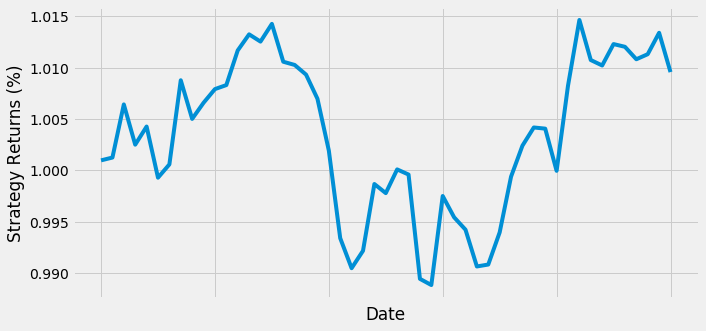

In [27]:
# Predicted Signal
Df['Predicted_Signal'] = mlp.predict(X)

# Calculate daily returns
Df['Return'] = Df.Close.pct_change()

# Calculate strategy returns
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

# Calculate geometric returns
geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()

## Extending the SVC Demo

### Exploring Train Test Splits

To explore how train test splits affect our classifier accuracy, let's explore all the possible test train splits. Below is a simple for loop that iterates through all the possible split percentages.


Train Accuracy: 100.00%
Test Accuracy: 53.01%


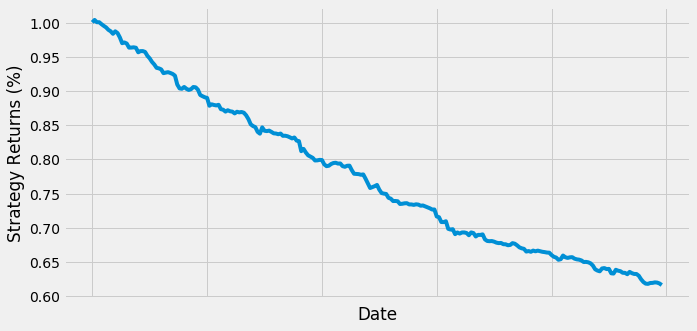


Train Accuracy: 60.00%
Test Accuracy: 43.09%


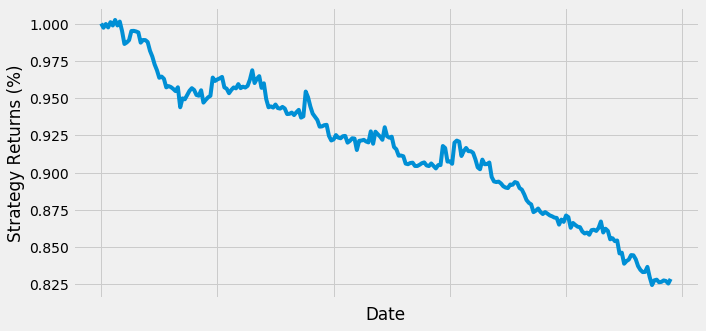


Train Accuracy: 57.14%
Test Accuracy: 43.03%


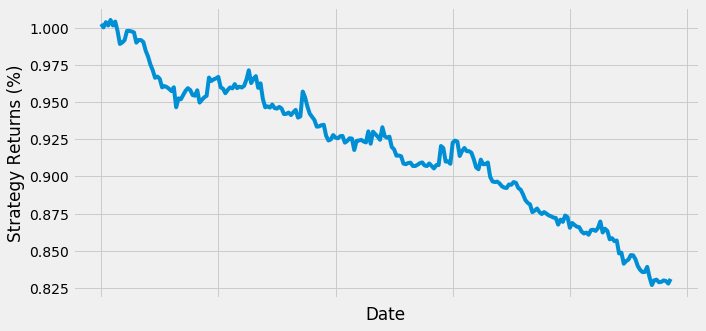


Train Accuracy: 90.00%
Test Accuracy: 54.36%


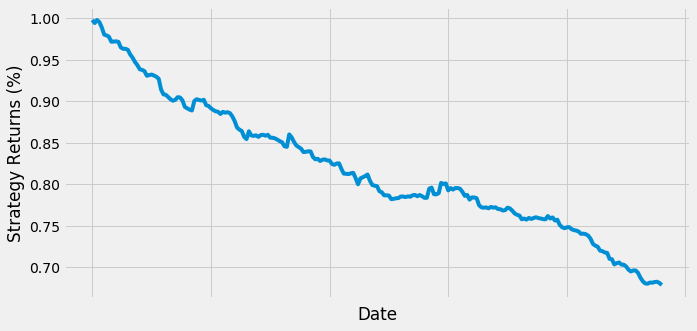


Train Accuracy: 91.67%
Test Accuracy: 51.88%


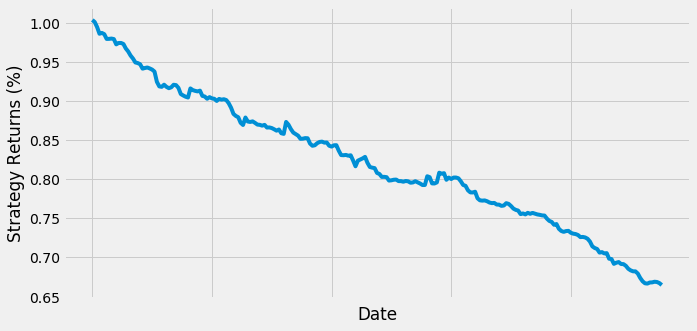


Train Accuracy: 66.67%
Test Accuracy: 49.58%


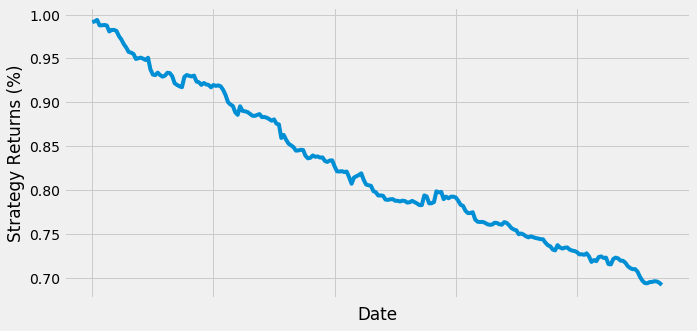


Train Accuracy: 70.59%
Test Accuracy: 49.15%


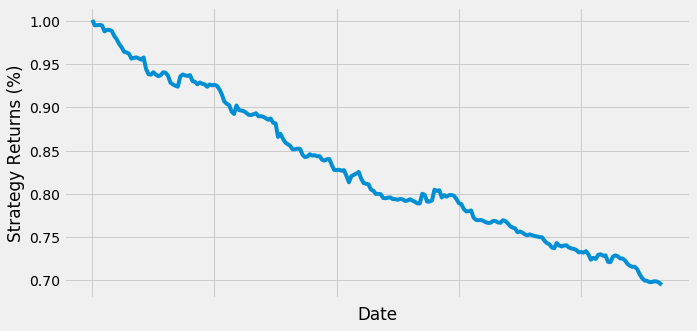


Train Accuracy: 65.00%
Test Accuracy: 49.35%


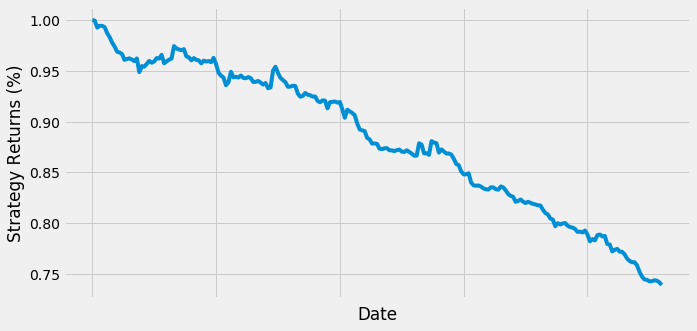


Train Accuracy: 63.64%
Test Accuracy: 49.78%


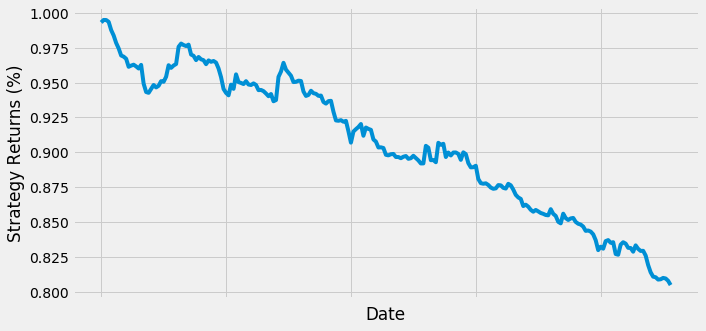


Train Accuracy: 64.00%
Test Accuracy: 49.12%


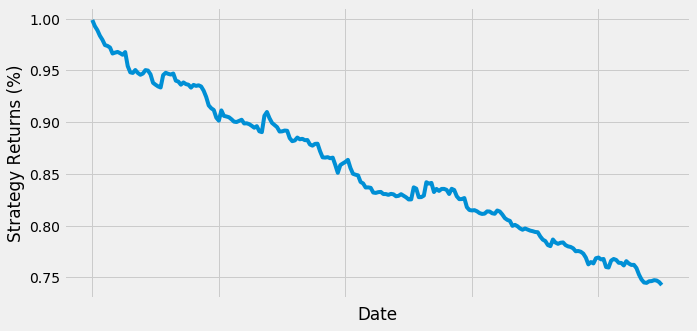


Train Accuracy: 59.26%
Test Accuracy: 55.36%


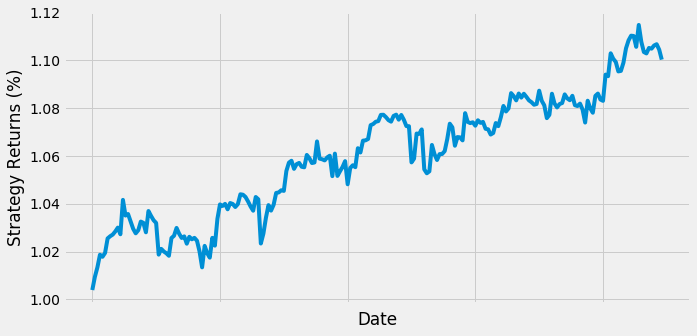


Train Accuracy: 60.00%
Test Accuracy: 56.11%


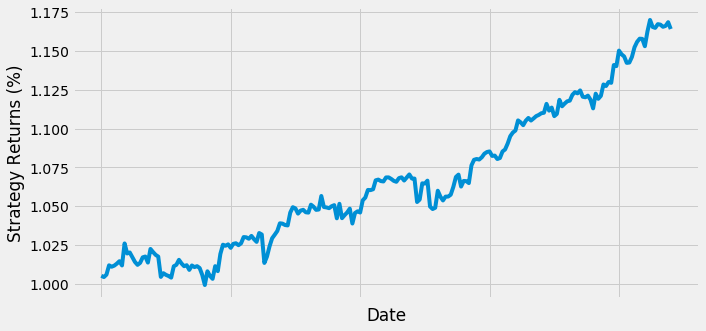


Train Accuracy: 59.38%
Test Accuracy: 56.16%


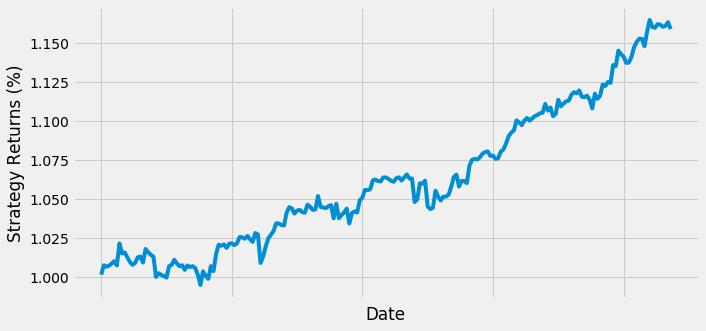


Train Accuracy: 60.00%
Test Accuracy: 56.02%


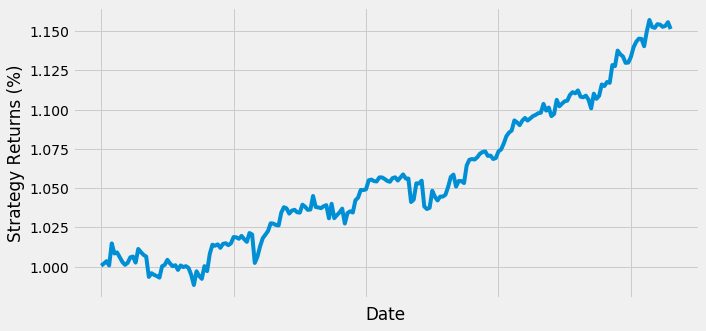


Train Accuracy: 62.16%
Test Accuracy: 55.61%


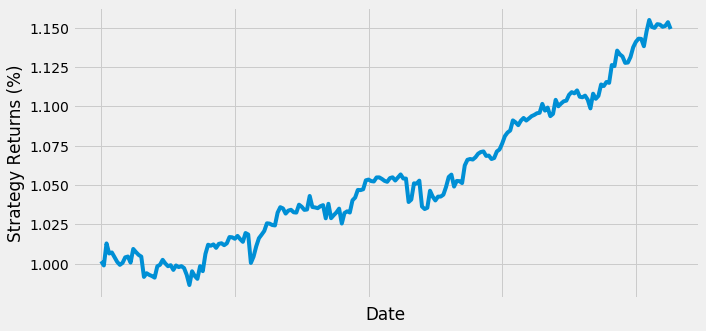


Train Accuracy: 60.00%
Test Accuracy: 55.92%


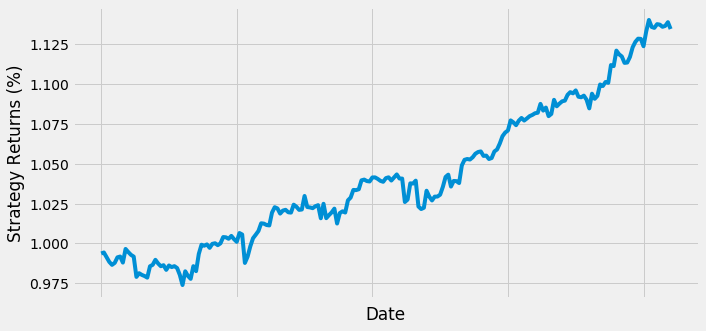


Train Accuracy: 59.52%
Test Accuracy: 55.98%


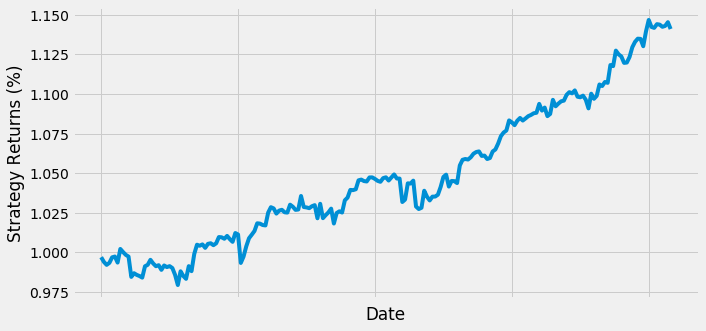


Train Accuracy: 57.78%
Test Accuracy: 56.31%


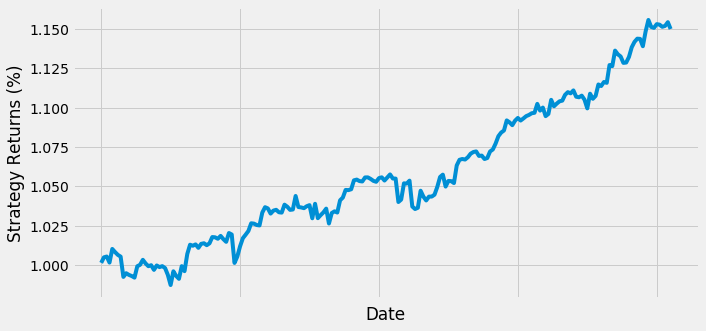


Train Accuracy: 59.57%
Test Accuracy: 55.88%


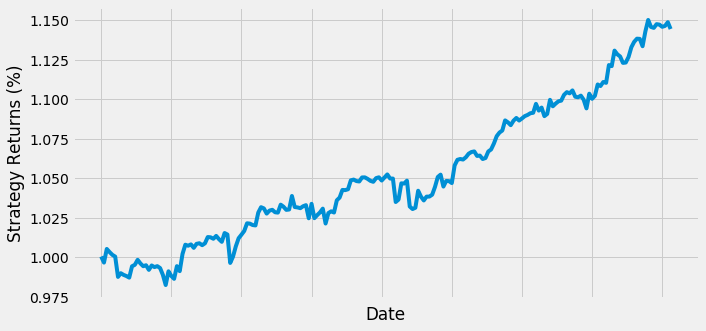


Train Accuracy: 66.00%
Test Accuracy: 57.21%


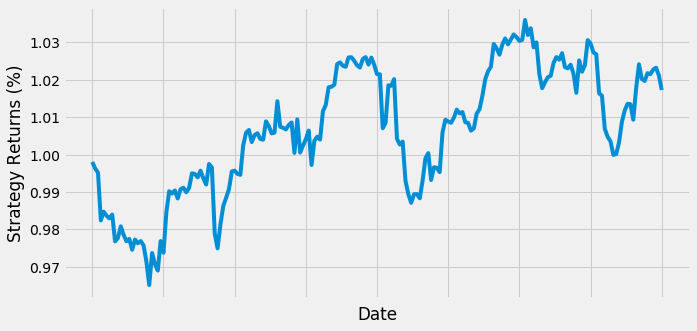


Train Accuracy: 67.31%
Test Accuracy: 55.28%


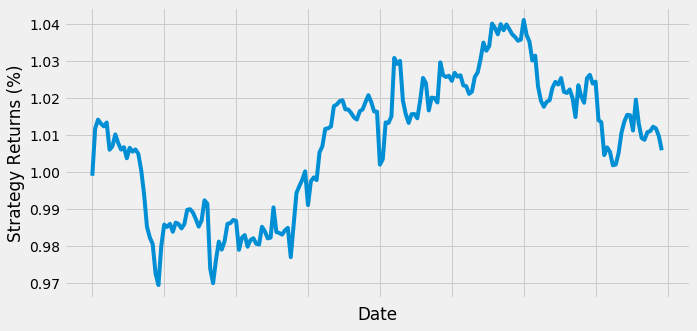


Train Accuracy: 65.45%
Test Accuracy: 51.02%


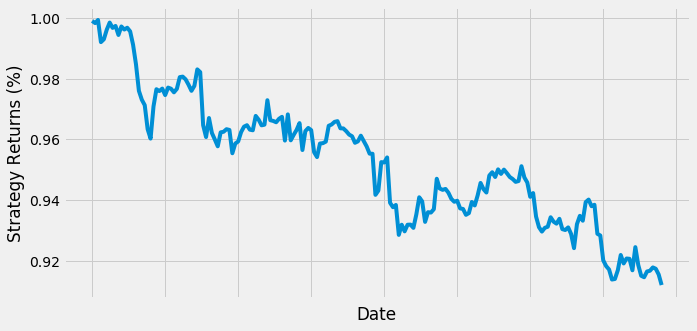


Train Accuracy: 59.65%
Test Accuracy: 54.12%


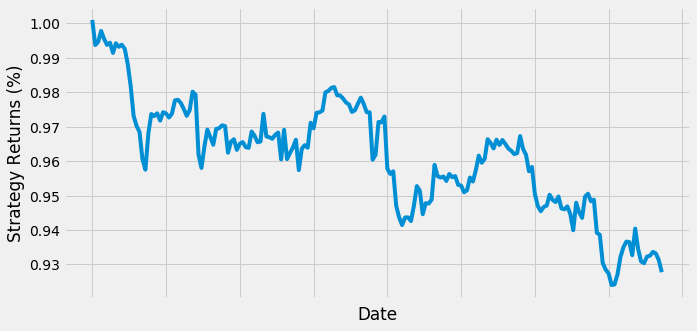


Train Accuracy: 55.00%
Test Accuracy: 57.07%


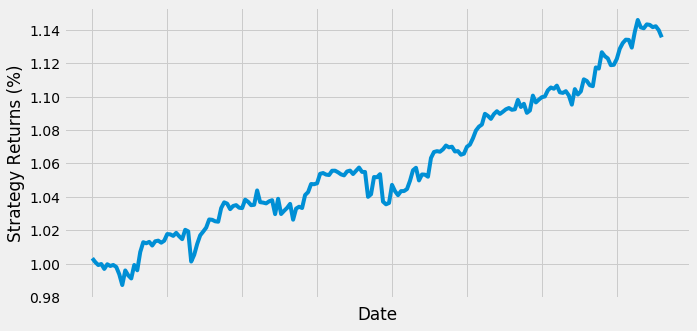


Train Accuracy: 61.29%
Test Accuracy: 50.79%


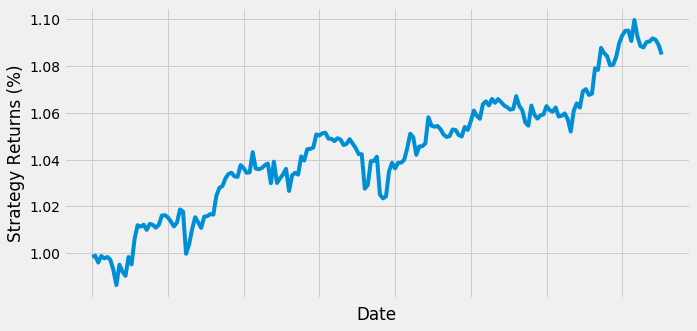


Train Accuracy: 63.08%
Test Accuracy: 48.39%


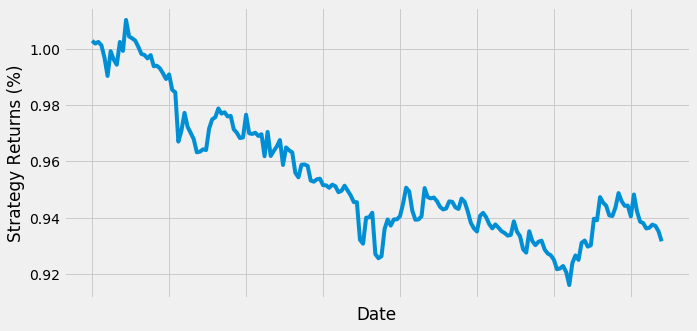


Train Accuracy: 58.21%
Test Accuracy: 49.46%


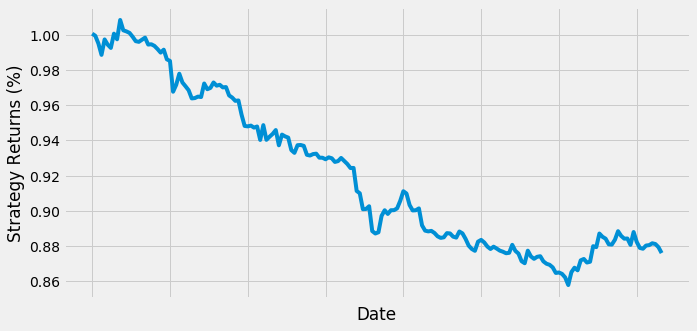


Train Accuracy: 57.14%
Test Accuracy: 50.83%


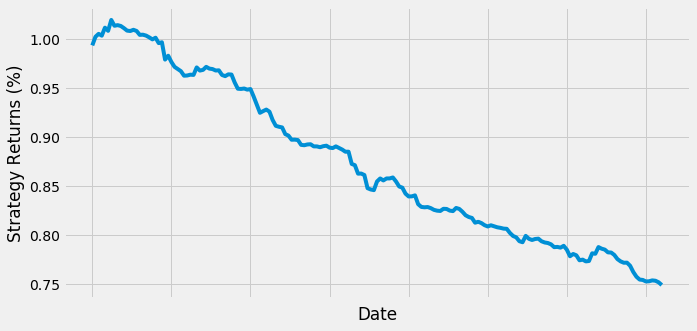


Train Accuracy: 61.11%
Test Accuracy: 50.84%


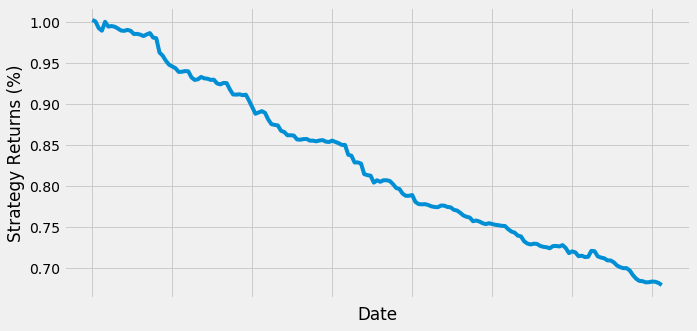


Train Accuracy: 62.67%
Test Accuracy: 48.30%


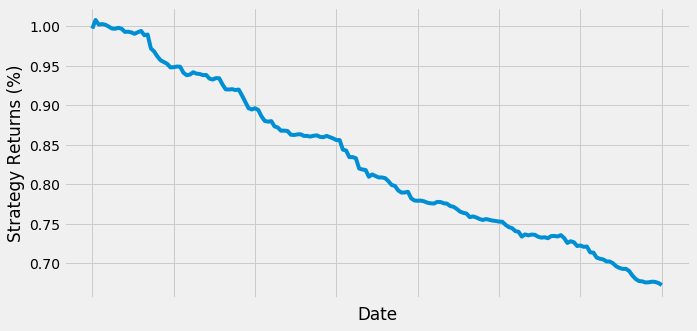


Train Accuracy: 62.34%
Test Accuracy: 50.00%


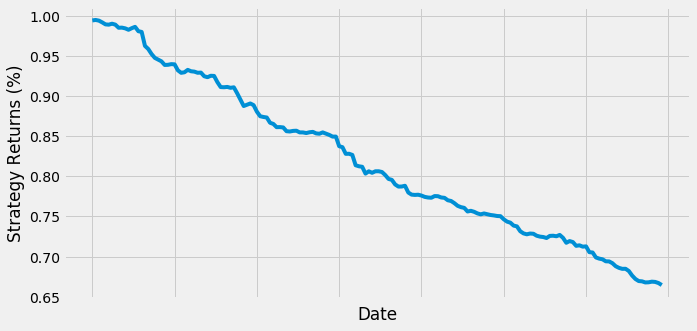


Train Accuracy: 62.50%
Test Accuracy: 49.12%


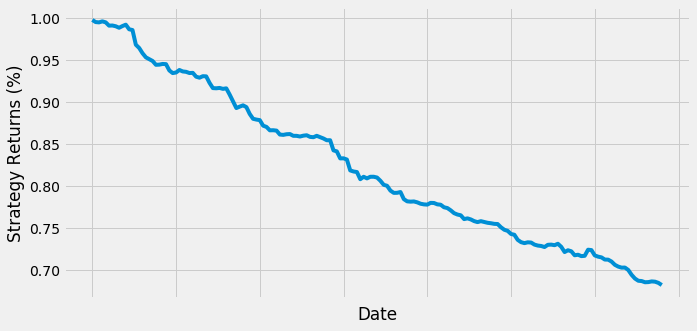


Train Accuracy: 62.20%
Test Accuracy: 49.70%


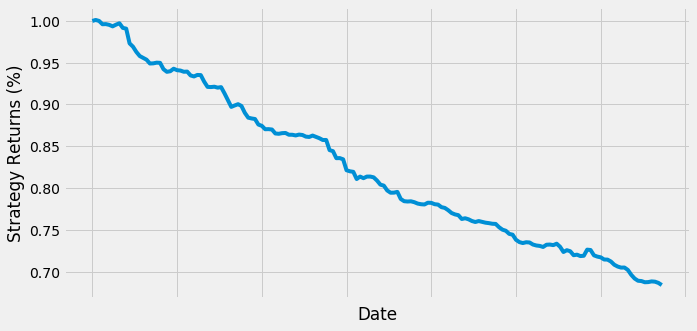


Train Accuracy: 62.35%
Test Accuracy: 50.60%


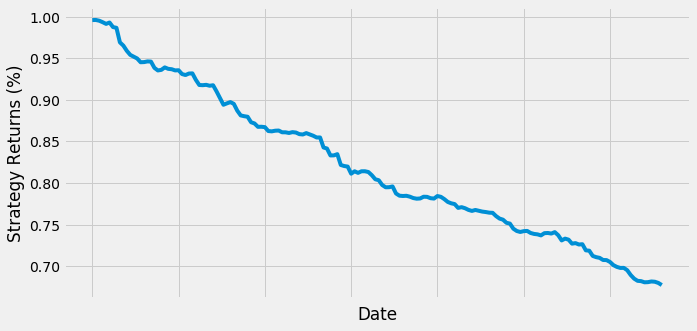


Train Accuracy: 62.07%
Test Accuracy: 50.00%


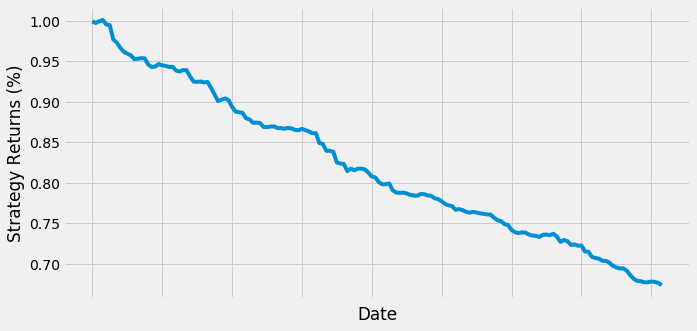


Train Accuracy: 63.33%
Test Accuracy: 48.45%


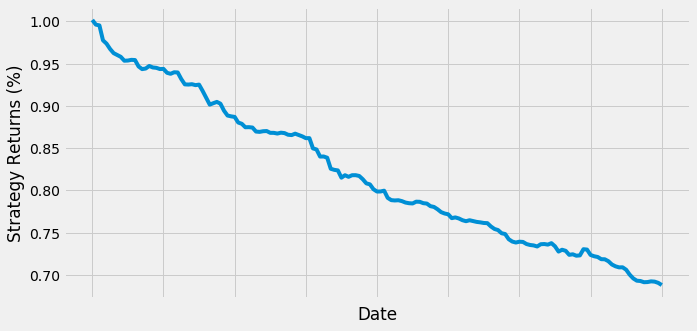


Train Accuracy: 63.04%
Test Accuracy: 48.43%


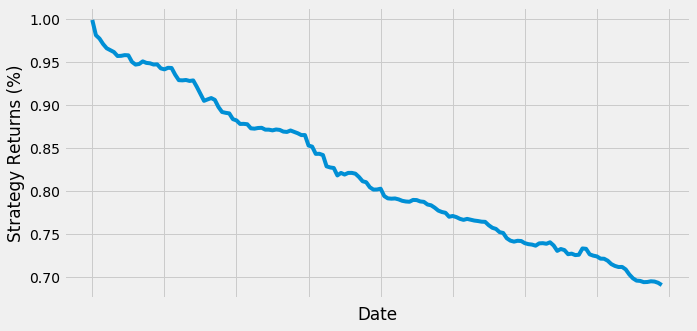


Train Accuracy: 62.11%
Test Accuracy: 47.44%


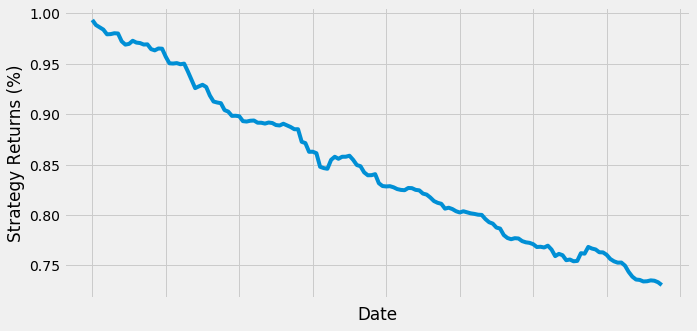


Train Accuracy: 60.82%
Test Accuracy: 49.35%


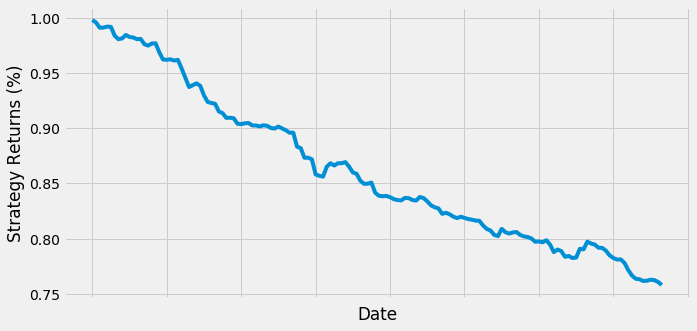


Train Accuracy: 62.00%
Test Accuracy: 49.67%


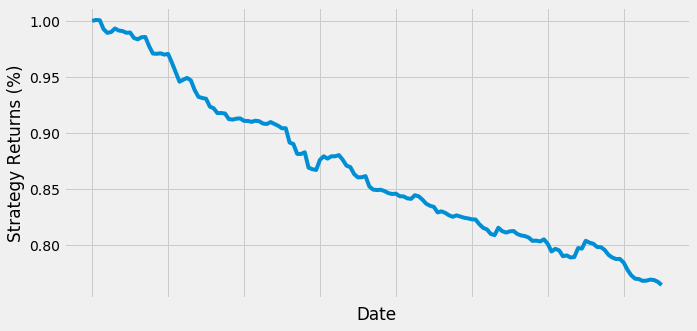


Train Accuracy: 60.78%
Test Accuracy: 48.99%


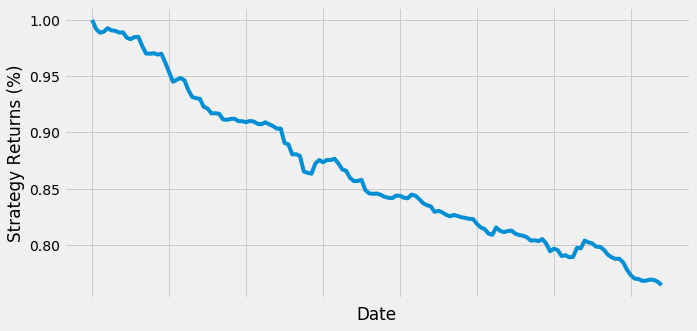


Train Accuracy: 60.95%
Test Accuracy: 47.26%


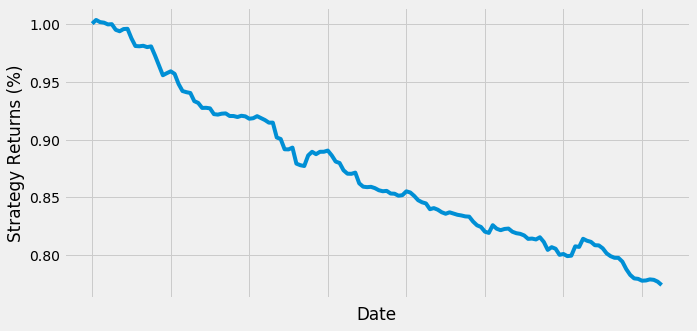


Train Accuracy: 60.75%
Test Accuracy: 47.92%


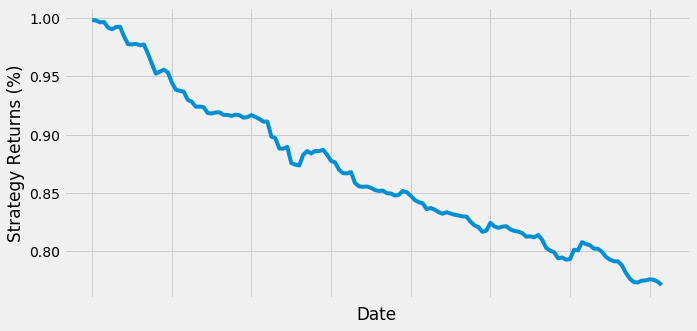


Train Accuracy: 60.00%
Test Accuracy: 47.52%


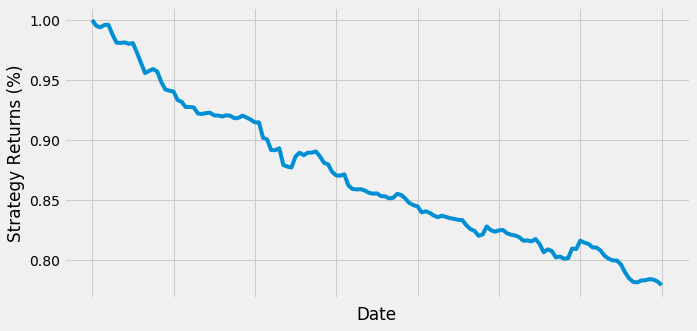


Train Accuracy: 58.93%
Test Accuracy: 47.48%


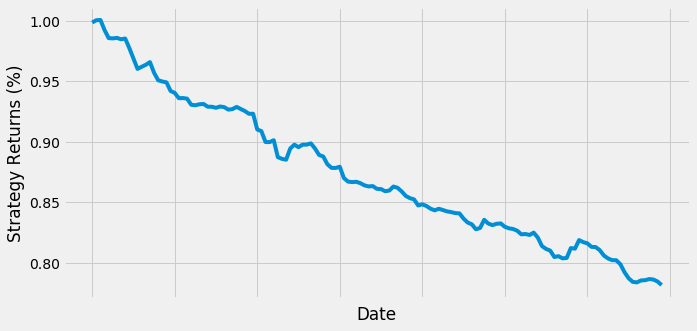


Train Accuracy: 57.39%
Test Accuracy: 47.06%


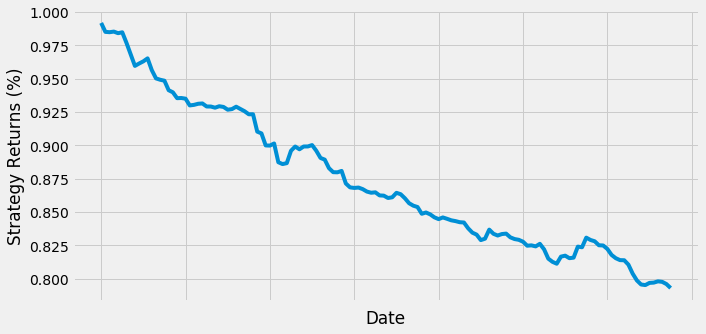


Train Accuracy: 55.56%
Test Accuracy: 46.27%


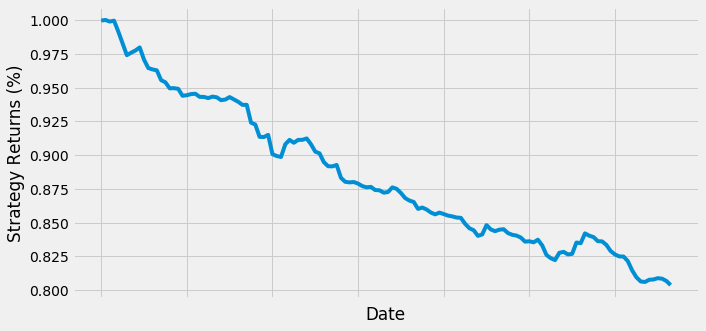


Train Accuracy: 56.67%
Test Accuracy: 48.09%


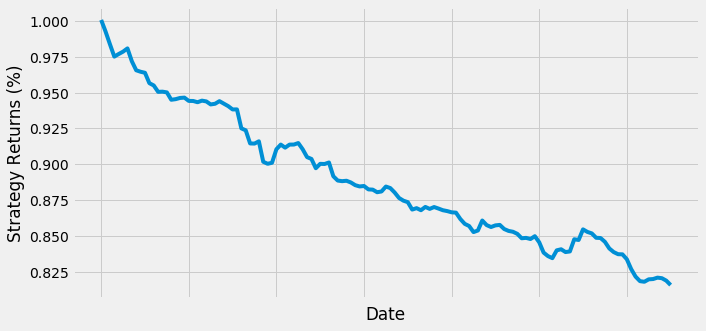


Train Accuracy: 54.10%
Test Accuracy: 47.29%


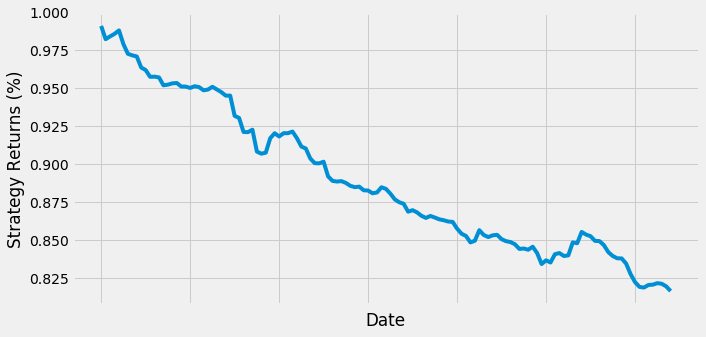


Train Accuracy: 59.20%
Test Accuracy: 48.41%


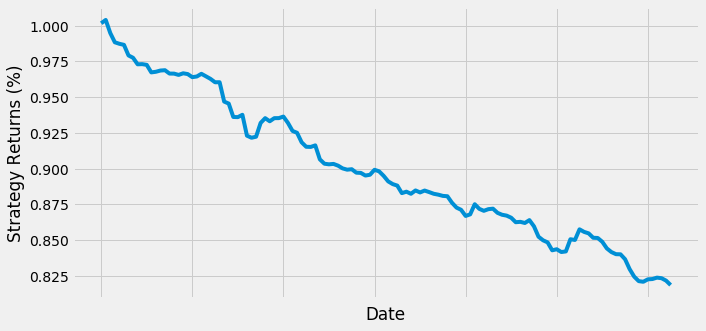


Train Accuracy: 57.81%
Test Accuracy: 47.15%


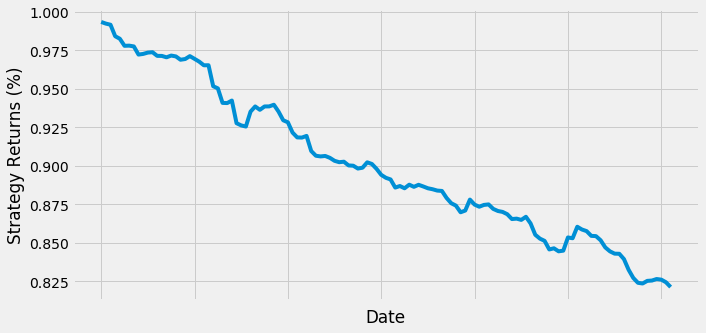


Train Accuracy: 55.38%
Test Accuracy: 45.45%


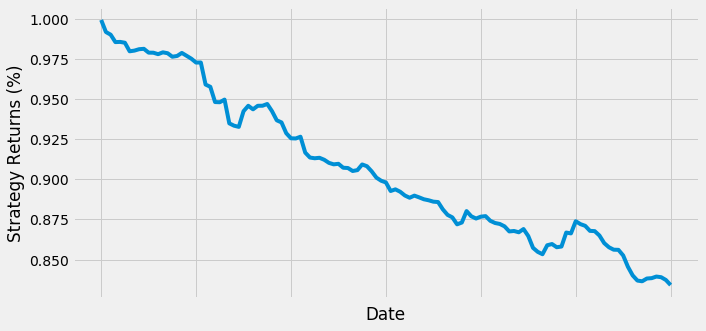


Train Accuracy: 59.40%
Test Accuracy: 47.46%


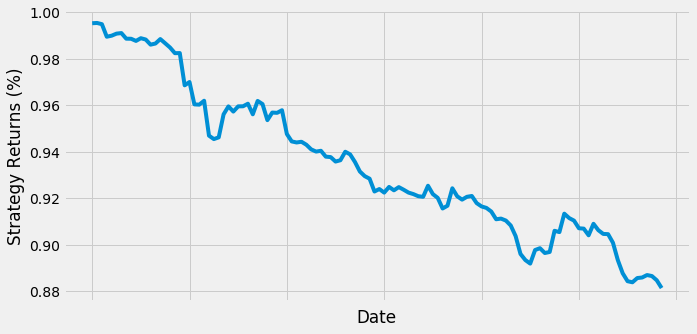


Train Accuracy: 59.26%
Test Accuracy: 50.00%


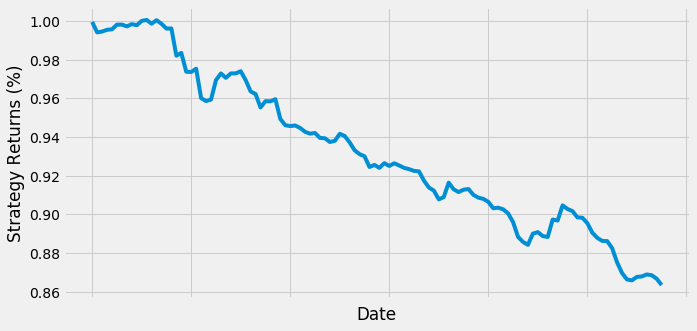


Train Accuracy: 57.97%
Test Accuracy: 48.67%


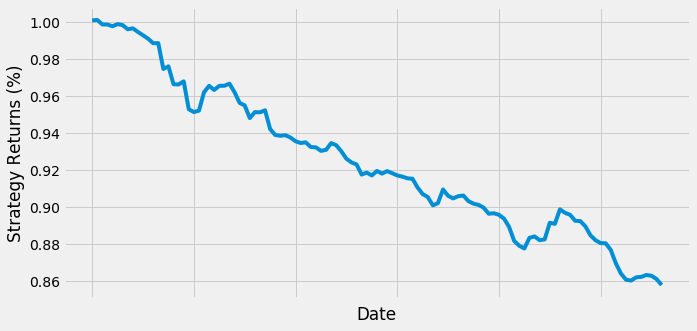


Train Accuracy: 57.86%
Test Accuracy: 50.45%


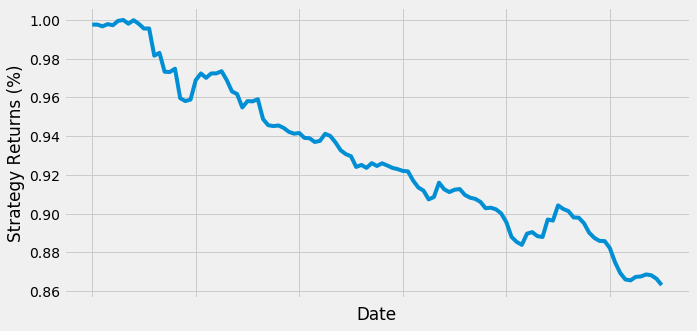


Train Accuracy: 56.64%
Test Accuracy: 51.85%


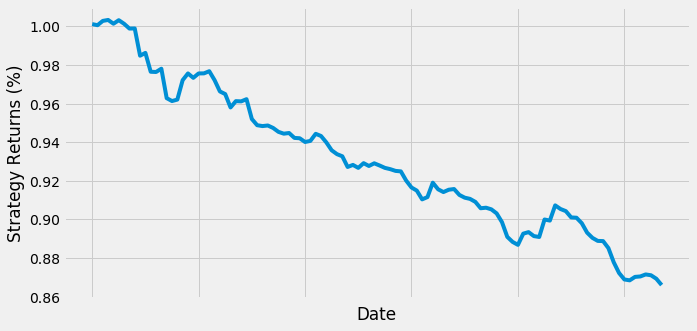


Train Accuracy: 57.93%
Test Accuracy: 51.89%


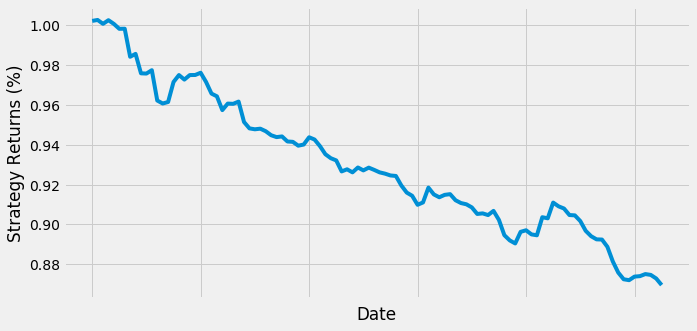


Train Accuracy: 58.78%
Test Accuracy: 55.34%


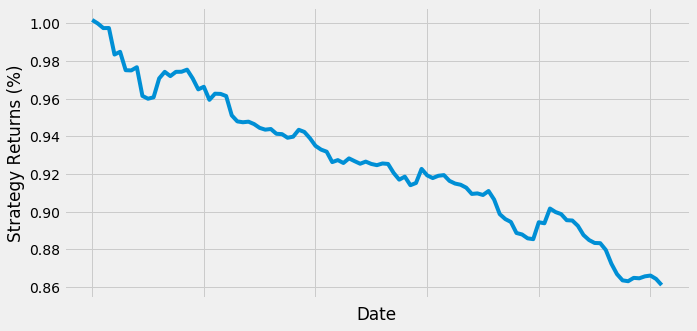


Train Accuracy: 58.67%
Test Accuracy: 53.47%


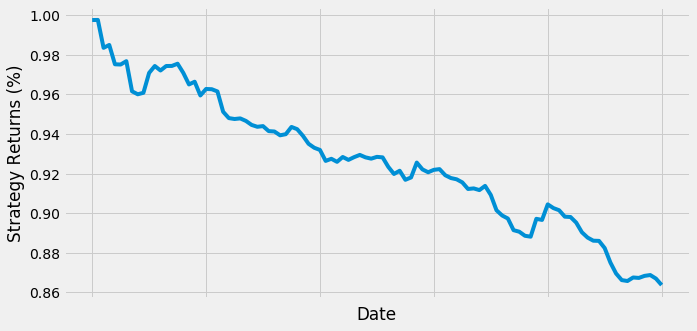


Train Accuracy: 58.82%
Test Accuracy: 51.02%


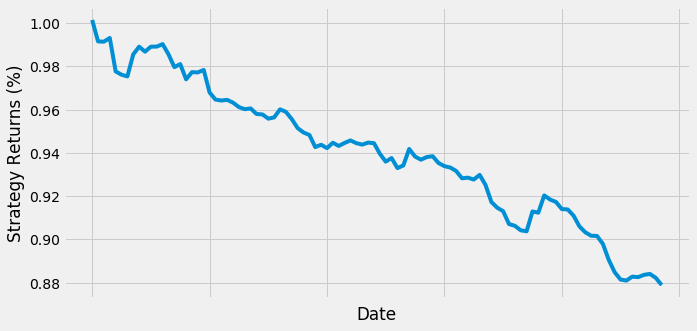


Train Accuracy: 61.29%
Test Accuracy: 54.17%


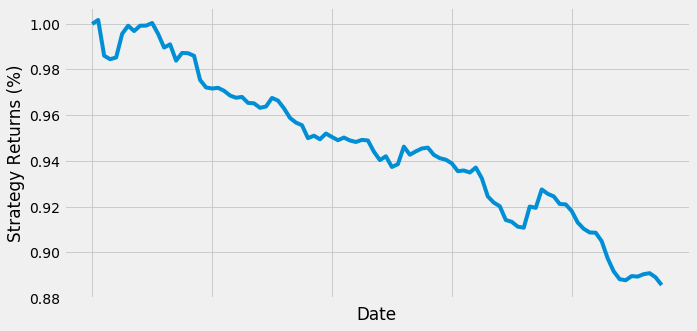


Train Accuracy: 60.76%
Test Accuracy: 54.84%


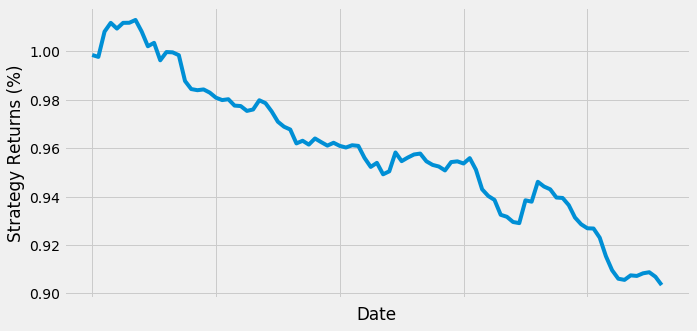


Train Accuracy: 60.62%
Test Accuracy: 53.85%


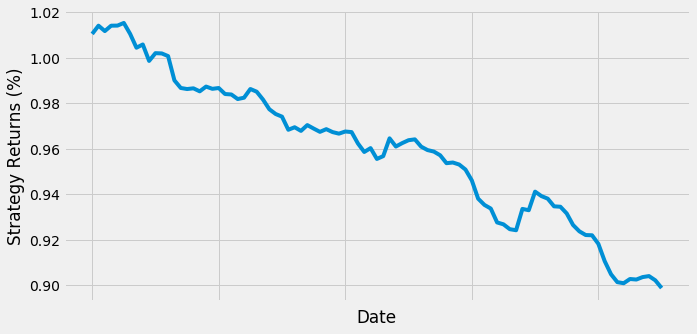


Train Accuracy: 60.74%
Test Accuracy: 52.27%


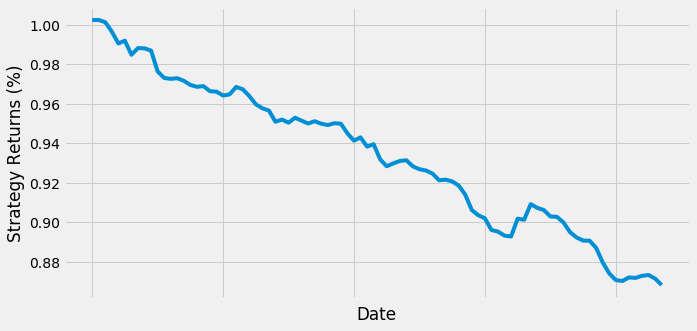


Train Accuracy: 61.82%
Test Accuracy: 51.16%


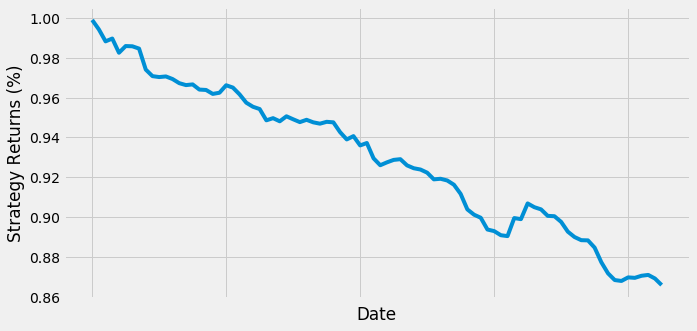


Train Accuracy: 58.93%
Test Accuracy: 46.99%


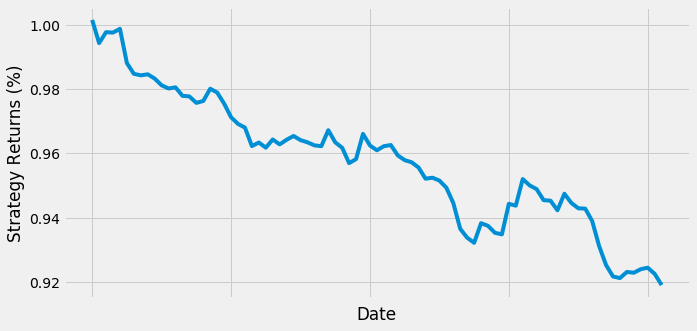


Train Accuracy: 61.18%
Test Accuracy: 46.91%


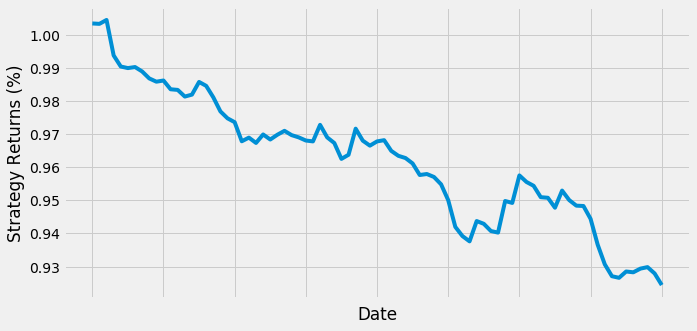


Train Accuracy: 60.12%
Test Accuracy: 47.44%


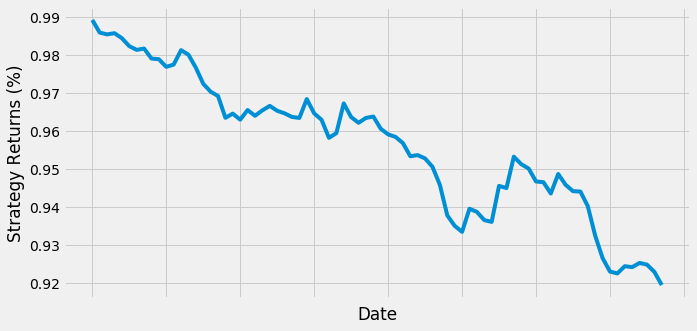


Train Accuracy: 59.43%
Test Accuracy: 48.68%


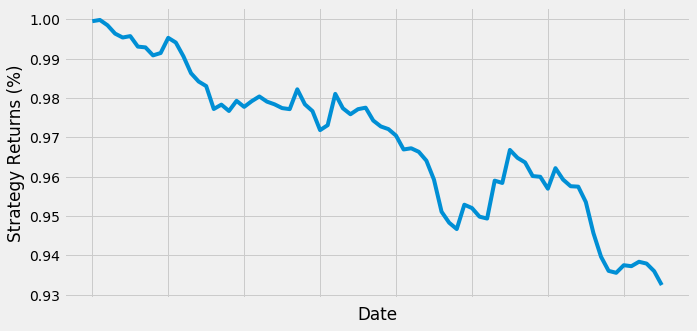


Train Accuracy: 58.43%
Test Accuracy: 54.79%


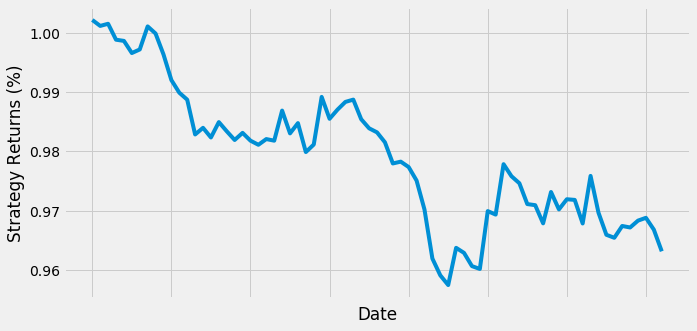


Train Accuracy: 55.56%
Test Accuracy: 57.75%


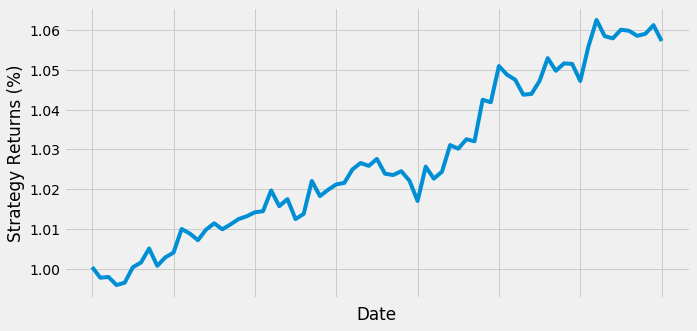


Train Accuracy: 56.83%
Test Accuracy: 51.47%


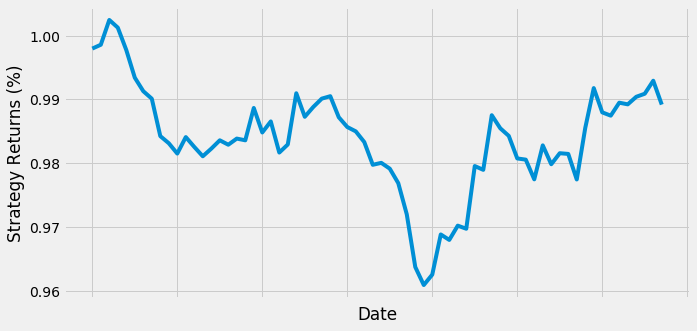


Train Accuracy: 60.00%
Test Accuracy: 54.55%


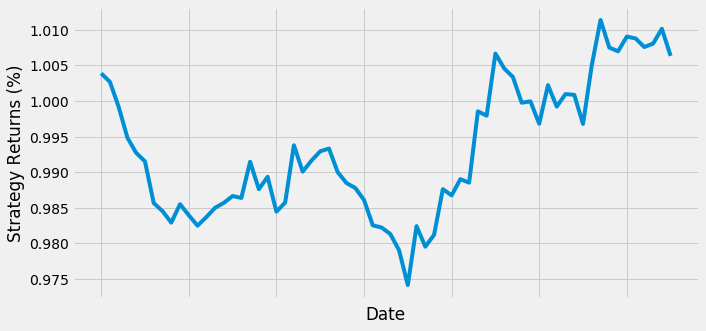


Train Accuracy: 55.85%
Test Accuracy: 58.73%


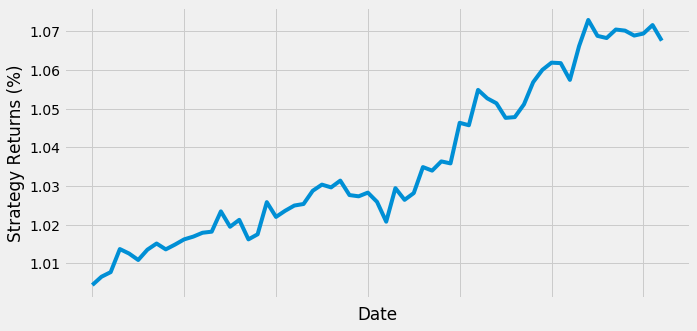


Train Accuracy: 56.32%
Test Accuracy: 57.38%


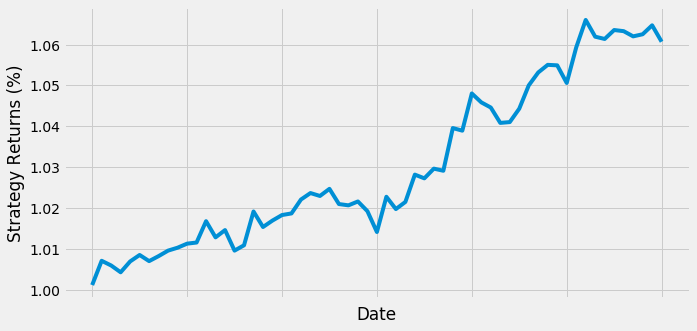


Train Accuracy: 55.96%
Test Accuracy: 58.62%


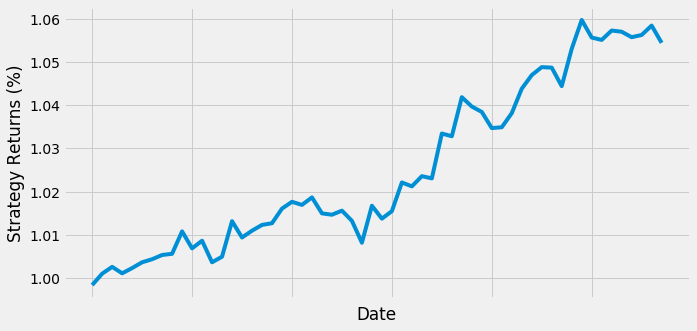


Train Accuracy: 56.41%
Test Accuracy: 57.14%


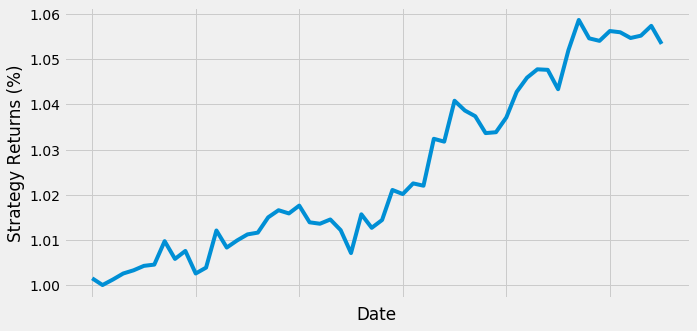


Train Accuracy: 56.57%
Test Accuracy: 56.60%


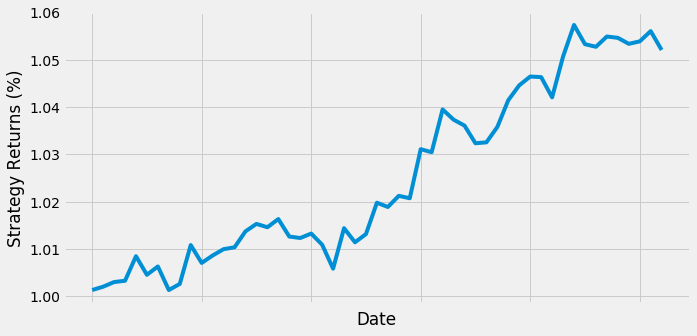


Train Accuracy: 57.00%
Test Accuracy: 54.90%


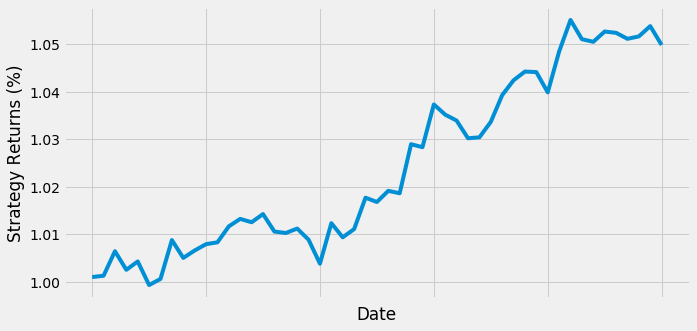


Train Accuracy: 57.14%
Test Accuracy: 54.17%


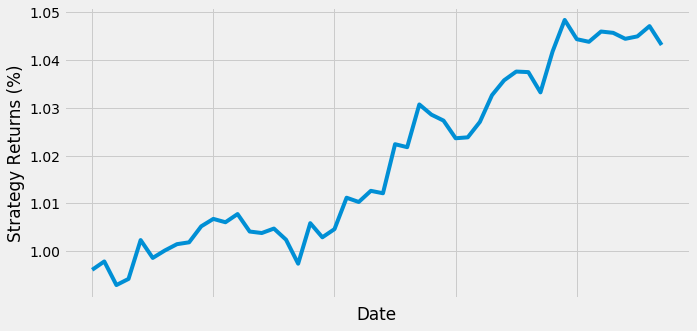


Train Accuracy: 57.07%
Test Accuracy: 54.35%


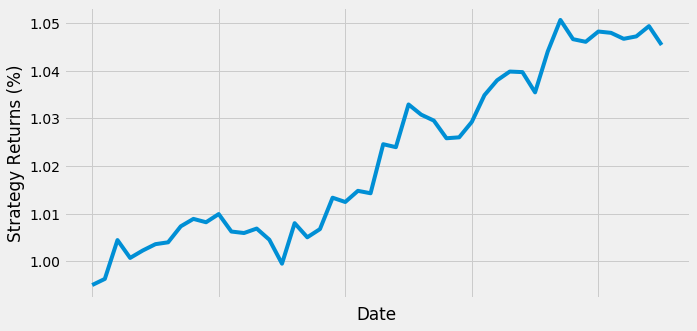


Train Accuracy: 57.21%
Test Accuracy: 53.49%


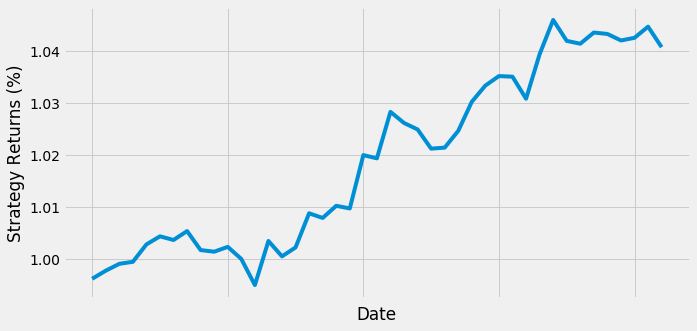


Train Accuracy: 57.62%
Test Accuracy: 51.22%


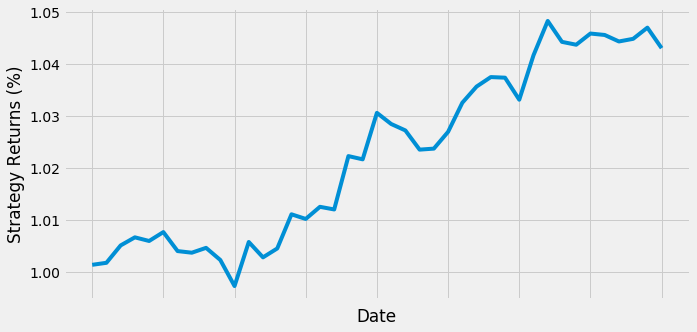


Train Accuracy: 58.22%
Test Accuracy: 47.37%


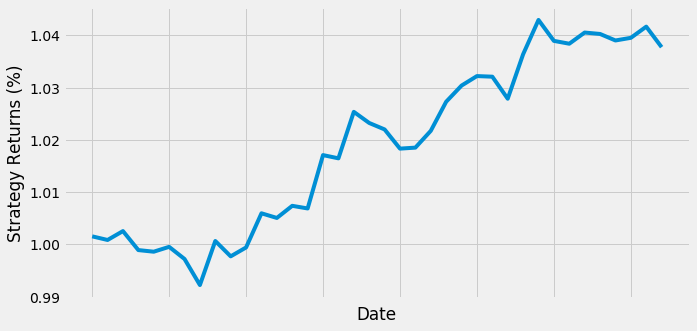


Train Accuracy: 58.14%
Test Accuracy: 47.22%


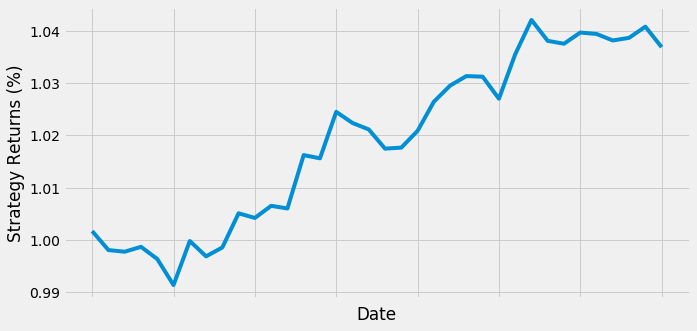


Train Accuracy: 57.80%
Test Accuracy: 48.48%


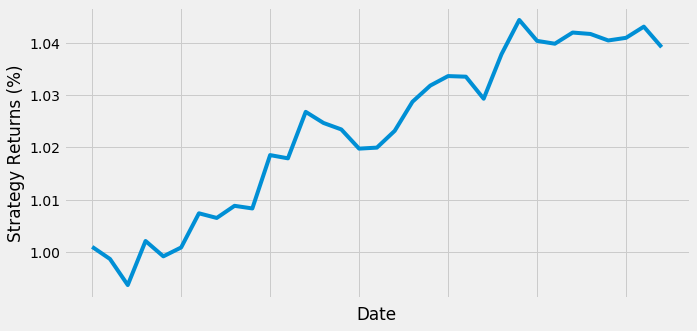


Train Accuracy: 57.27%
Test Accuracy: 51.61%


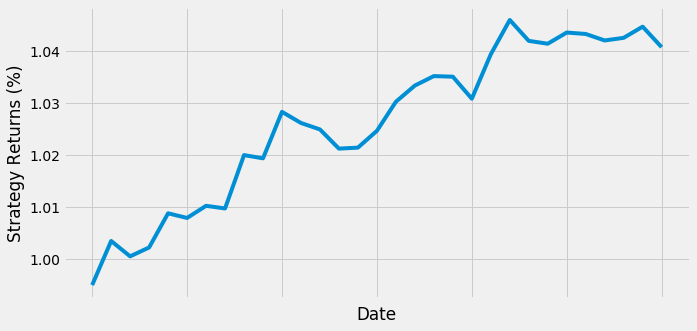


Train Accuracy: 57.40%
Test Accuracy: 42.86%


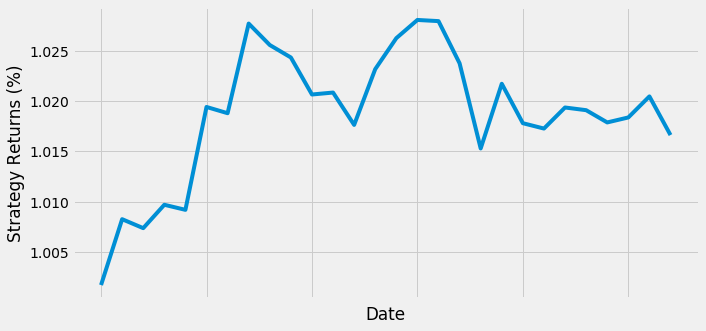


Train Accuracy: 59.11%
Test Accuracy: 46.15%


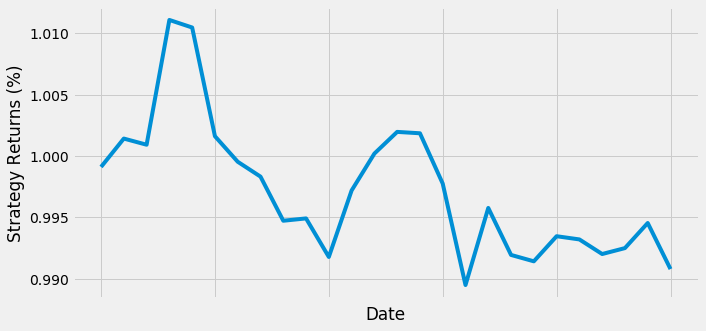


Train Accuracy: 59.21%
Test Accuracy: 43.48%


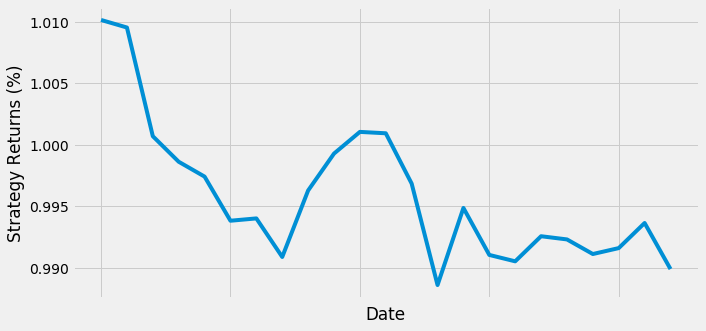


Train Accuracy: 59.13%
Test Accuracy: 42.86%


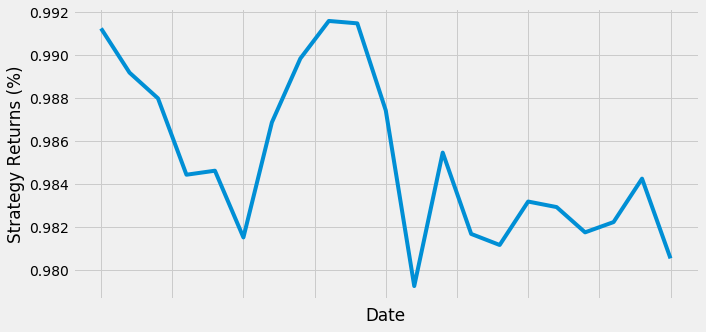


Train Accuracy: 60.09%
Test Accuracy: 44.44%


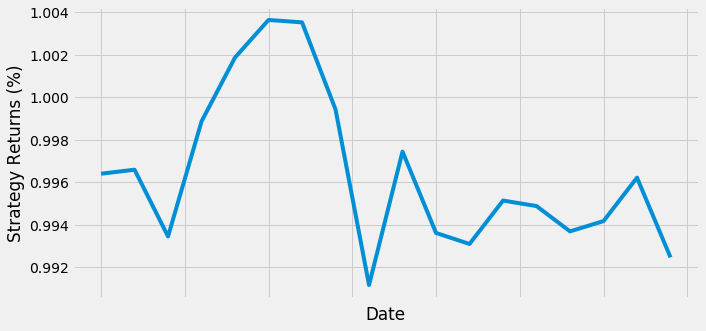


Train Accuracy: 60.43%
Test Accuracy: 37.50%


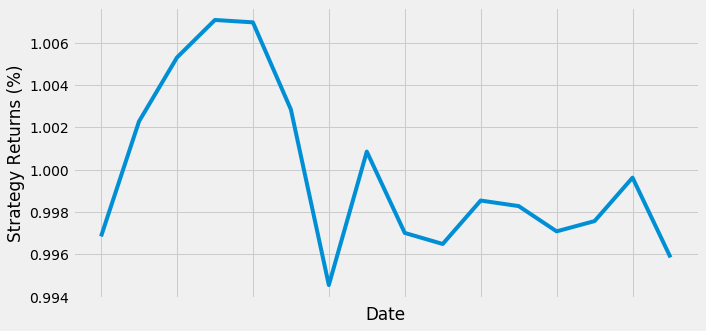


Train Accuracy: 57.98%
Test Accuracy: 30.77%


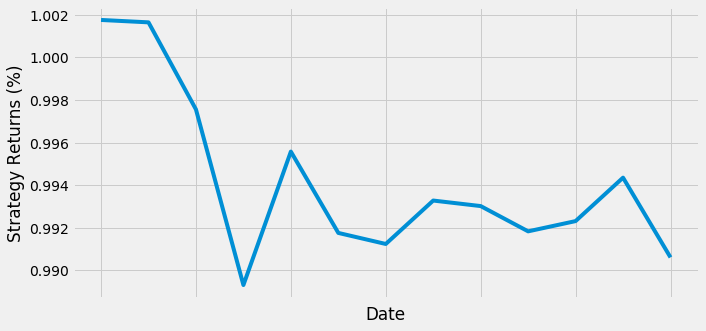


Train Accuracy: 57.50%
Test Accuracy: 36.36%


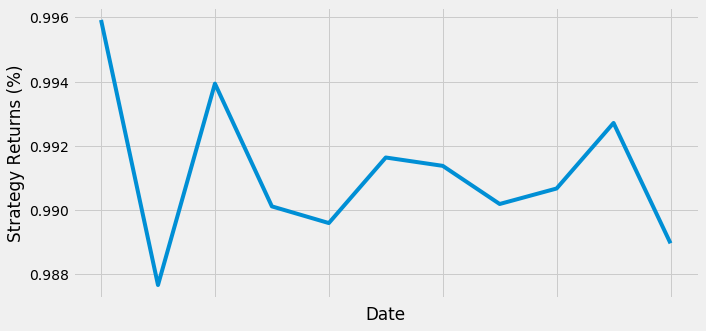


Train Accuracy: 58.02%
Test Accuracy: 37.50%


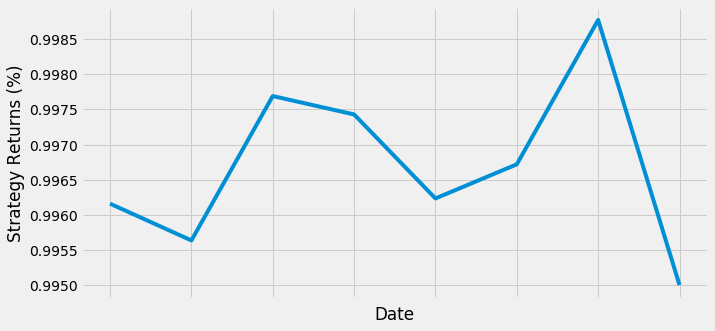


Train Accuracy: 58.78%
Test Accuracy: 33.33%


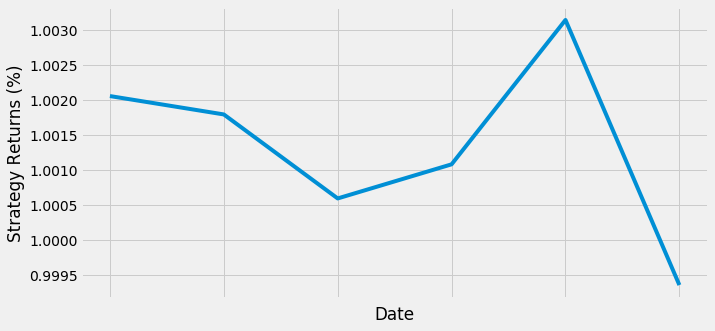

In [36]:
for x in range (1, 99):
    split_percentage = (x / 100)
    split = int(split_percentage*len(Df))

    # Train data set
    X_train = X[:split]
    y_train = y[:split] 

    # Test data set
    X_test = X[split:]
    y_test = y[split:]

    # Support vector classifier
    cls = SVC().fit(X_train, y_train)

    # train and test accuracy
    accuracy_train = accuracy_score(y_train, cls.predict(X_train))
    accuracy_test = accuracy_score(y_test, cls.predict(X_test))

    print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
    print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))

    # Predicted Signal
    Df['Predicted_Signal'] = cls.predict(X)

    # Calculate daily returns
    Df['Return'] = Df.Close.pct_change()

    # Calculate strategy returns
    Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

    # Calculate geometric returns
    geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

    # Plot geometric returns
    geometric_returns.plot(figsize=(10,5))
    plt.ylabel("Strategy Returns (%)")
    plt.xlabel("Date")
    plt.show()

Now this of course a lot of charts to sift through. Let's filter these to see what split percentage yields us the best strategy returns and the worst ones.

In [49]:
print (geometric_returns)

Date
21-12-2017    1.002060
22-12-2017    1.001798
26-12-2017    1.000599
27-12-2017    1.001086
28-12-2017    1.003146
29-12-2017    0.999363
Name: Strategy_Return, dtype: float64
